# Stork Diary

## 20200225 15:00 28.40买入万业企业 600641 100股

收盘时买入，后期应该盘中买入。买股票是投资不是投机，设定好交易策略，认赌要服输。

### MACD DIf DEA 红绿柱

$Dif = EMA_{12} - EMA_{26}$ 
DIF代表长短期均线之间的差，绝对值越大，代表股票上涨或下跌呈加速状态。
顶背离股价上涨 DIF下降，上涨势头越来越弱，曲线越来越到最高点
底背离  代表下跌势头减弱
DIF>0;则金叉适合买 死叉意味着上涨势头变弱
$DEA = DIF_9$
开盘价不一定等于收盘价

### 做T

做T需要流动资金，因此在投资时不要一波进，像定投股票
1.下降趋势
2.震荡趋势
3.上升趋势

## 20200226 跌300

## 20200226 跌141

## 20200301

避免短线频繁交易，不要尝试抓住每一次波动；避免逆势操作下跌很多时买入也未必好；避免重仓交易，留下流动资金；减少无意义的工作和干扰，时刻盯着报价系统，其实小波动是无意义的，试着重新开始。

## 20200319

In [ ]:
万业：收盘价：22.95；涨幅：7.65%
东方航空：4.10；涨幅：-3.76%
先去实现一些简单的策略
1.股票价格间关联 两两关联。傅里叶变换到矢量空间?用处？

2.vn.py

# 量化系统 

## Numpy

### 初始化操作

In [7]:
import numpy as np
np.zeros(100)
np.zeros((3,2))
np.ones((3,2))
np.empty((2, 3, 3))

np_list = np.arange(10000)
np.ones_like(np_list)
np.zeros_like(np_list)

np.eye(3) #单位阵

data = [[1,2,3,4],[5,6,7,8]]
arr_np = np.array(data)
arr_np

np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

### 索引选取和切片操作

In [3]:
stork_cnt = 200
view_days = 504
stork_day_change = np.random.standard_normal((stork_cnt,view_days))
tmp  = stork_day_change[0:2,0:5].copy()
stork_day_change[0:2, 0:5] = stork_day_change[-2:, -5:]
stork_day_change[-2:, -5:] = tmp
stork_day_change[-2:, -5:] 

array([[ 1.76118713,  0.15905488, -0.85201637, -0.15000311,  0.55616961],
       [-0.43055398,  0.54570952, -0.35773415,  2.0335351 , -2.60442972]])

### 数据转换与规整

In [13]:
#转换数据类型
stork_day_change[0:2 ,0:5].astype(int)
#保留小数点数位
np.around(stork_day_change[0:2 ,0:5],2)
#nan 数据处理
tmp_test = stork_day_change[0:2, 0:5].copy()
tmp_test[0][0] = np.nan
tmp_test

array([[        nan, -0.70811378,  0.96857743,  0.95027533,  0.45339739],
       [-0.04994816,  1.22658165, -1.57942391,  1.59261325,  0.65203405]])

In [15]:
tmp_test = np.nan_to_num(tmp_test)
tmp_test

array([[ 0.        , -0.70811378,  0.96857743,  0.95027533,  0.45339739],
       [-0.04994816,  1.22658165, -1.57942391,  1.59261325,  0.65203405]])

### 逻辑条件进行数据筛选

In [16]:
mask = stork_day_change[0:2, 0:5] >0.5
mask #bool

array([[False, False,  True,  True, False],
       [False,  True, False,  True,  True]])

In [17]:
tmp_test = stork_day_change[0:2, 0:5].copy()
tmp_test[mask]

array([0.96857743, 0.95027533, 1.22658165, 1.59261325, 0.65203405])

In [19]:
tmp_test[tmp_test>0.5] 
tmp_test[tmp_test>0.5] = 1

### 通用序列函数

In [20]:
np.all(mask)

False

In [21]:
np.any(mask)#是否有true

True

In [24]:
np.maximum(stork_day_change[0:2, 0:5],stork_day_change[-2:, -5:])

array([[-0.47333664,  0.12100969,  0.96857743,  0.95027533,  0.45339739],
       [ 0.07032375,  1.22658165, -0.80839282,  1.59261325,  0.94774359]])

In [26]:
change_int = stork_day_change[0:2 ,0:5].astype(int)
print(change_int)
np.unique(change_int)

[[ 0  0  0  0  0]
 [ 0  1 -1  1  0]]


array([-1,  0,  1])

In [28]:
print(stork_day_change[0:2, 0:5])
np.diff(stork_day_change[0:2, 0:5]) # 默认axis=1
np.diff(stork_day_change[0:2, 0:5],axis=0)

[[-0.47333664 -0.70811378  0.96857743  0.95027533  0.45339739]
 [-0.04994816  1.22658165 -1.57942391  1.59261325  0.65203405]]


array([[ 0.42338849,  1.93469544, -2.54800133,  0.64233793,  0.19863666]])

In [29]:
np.where(tmp_test>0.5, 1, 0) #
np.where(tmp_test>0.5, 1, tmp_test)
np.where(np.logical_and(tmp_test>0.5, tmp_test<1), 1, 0)
np.where(np.logical_or(tmp_test>0.5, tmp_test<-0.5), 1, 0)

array([[0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1]])

## 基础统计概念与函数 

In [31]:
#np.max()
#np.min()
#np.std()
#np.mean()
stork_day_change_four = stork_day_change[:4, :4]
print(stork_day_change_four)
np.argmax(stork_day_change_four,axis=0)

[[-0.47333664 -0.70811378  0.96857743  0.95027533]
 [-0.04994816  1.22658165 -1.57942391  1.59261325]
 [ 0.51794467 -0.05347199  1.6771056   0.20543282]
 [-0.57182273  1.02294919  0.39288208 -0.67850236]]


array([2, 1, 2, 1])

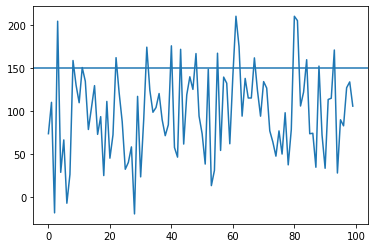

In [33]:
import matplotlib.pyplot as plt
a_investor = np.random.normal(loc=100,scale=50,size=(100,1))
plt.plot(a_investor)
plt.axhline(a_investor.mean()+a_investor.std())

###  histogram 和拟合曲线

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/gysun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


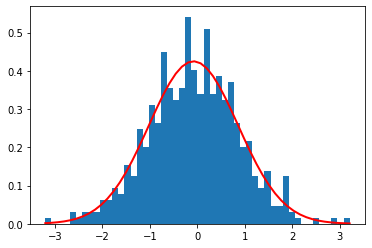

In [36]:
import scipy.stats as scs
plt.hist(stork_day_change[0],bins=50,normed=True)
fit_linspace = np.linspace(stork_day_change[0].min(),stork_day_change[0].max())
pdf = scs.norm(stork_day_change[0].mean(), stork_day_change[0].std()).pdf(fit_linspace)
plt.plot(fit_linspace,pdf, lw=2, c='r')

### 正态分布买入策略 

[-59.94402332 -52.79023424 -46.0980809 ]
买入第[149  50 114]只股票，从第454个交易日开始持有盈亏：8.23%


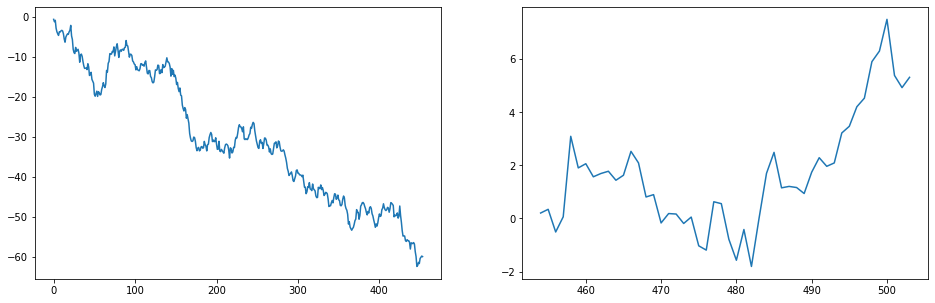

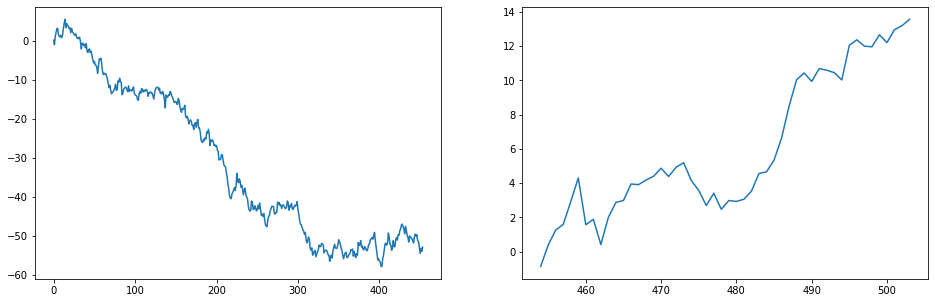

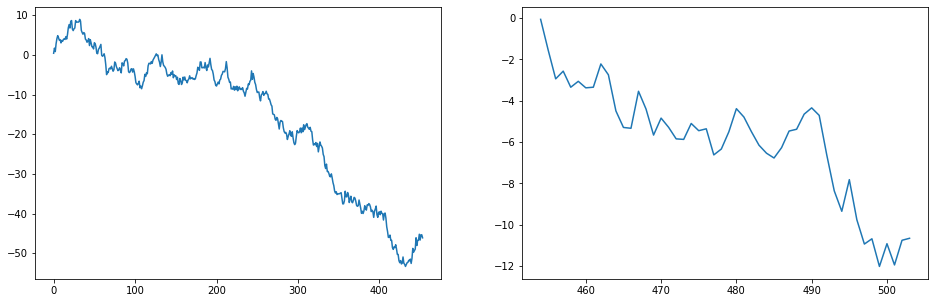

In [15]:
import numpy as np
import matplotlib.pyplot as plt
#np.sort()
#np.argsort() 排序后的元素在原序列的原序号

view_days = 504
keep_days = 50 #保留后50天
stork_day_change_test =  stork_day_change[:stork_cnt, 0:view_days - keep_days]
# 找出跌幅最大的三只股票
print(np.sort(np.sum(stork_day_change_test,axis=1))[:3])
stork_lower_array = np.argsort(np.sum(stork_day_change_test,axis=1))[:3]
stork_lower_array

def show_buy_lower(stork_ind):
    '''
    :param stork_ind :股票序号，
    :return:
    '''
    _, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    axs[0].plot(np.arange(0,view_days - keep_days),stork_day_change_test[stork_ind].cumsum())
    #np.cumsum() 连续求和
    cs_buy = stork_day_change[stork_ind][view_days-keep_days:view_days].cumsum()
    axs[1].plot(np.arange(view_days-keep_days,view_days),cs_buy)
    return cs_buy[-1]

profit = 0 
for stork_ind in stork_lower_array:
    profit += show_buy_lower(stork_ind)
print ('买入第{}只股票，从第454个交易日开始持有盈亏：{:.2f}%'.format(stork_lower_array, profit))
plt.show()

### 伯努利分布 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
w = np.random.binomial(1,0.5)
print(w)

1


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


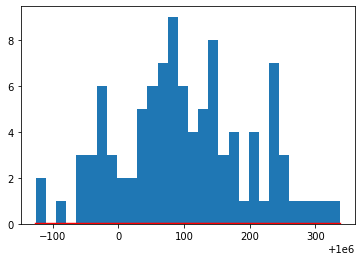

In [13]:
import scipy.stats as scs
gamblers = 100
def casino(win_rate, win_once=1, loss_once=1, commission=0.01):
    '''
    money: 1,000,000, playtime: 1,000,000
    win_rate: possibility for win
    loss_once、win_once : the amount money for once win or loss
    commission: commission 手续费
    '''
    my_money = 1000000
    play_cnt = 10000
    commission = commission
    for _ in np.arange(0,play_cnt):
        w = np.random.binomial(1,win_rate)
        if w:
            my_money += win_once
        else:
            my_money -= loss_once
        my_money -= commission
        if my_money <= 0:
            break
    return my_money
heaven_moneys = [casino(0.5, 1.02, 0.98, 0.01) for _ in np.arange(0, gamblers)]
heaven_moneys = np.array(heaven_moneys)
_ = plt.hist(heaven_moneys, bins=30)
fit_linspace = np.linspace(heaven_moneys.min(),heaven_moneys.max())
pdf = scs.norm(heaven_moneys.mean(), heaven_moneys.std()).pdf(fit_linspace)
plt.plot(fit_linspace,pdf, lw=2, c='r')

## MC Forecasting Stock Prices

In [12]:
import numpy as np
import pandas as pd
from distutils.version import LooseVersion
pd.__version__
print(LooseVersion(pd.__version__))
print(LooseVersion('0.20.0'))
print((LooseVersion(pd.__version__) >= LooseVersion('0.20.0')))


1.0.1
0.20.0
True


2020的pandas1.0.1 弃用了Deprecate / Remove pandas.util.testing.assert_raises_regex 
https://github.com/pandas-dev/pandas/issues/29187
而pandas.datareader 没有改
换用0.25.0 版本pandas 解决

In [20]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

ticker = '600641.SS'
data = pd.DataFrame()
#data = wb.DataReader(ticker, data_source='yahoo',start='2017-1-1')
#print(data)
data[ticker] = wb.DataReader(ticker, data_source='yahoo',start='2019-1-1')['Adj Close']
#print(data)

In [21]:
log_returns = np.log(1 + data.pct_change())#pct_change: (x_i+1 - x_i) / x_i 

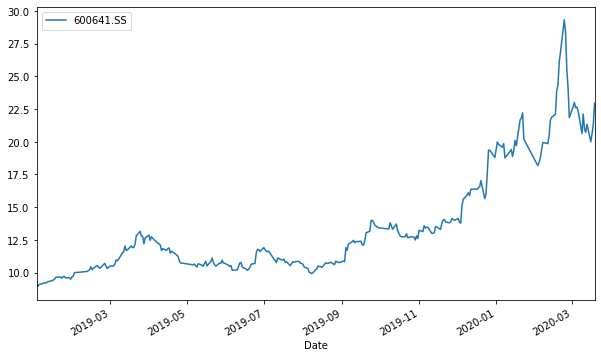

In [22]:
data.plot(figsize=(10,6))

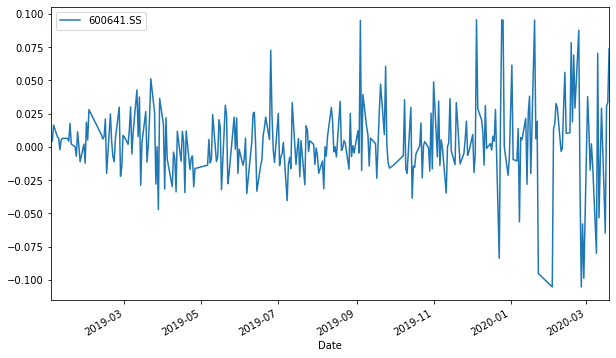

In [23]:
log_returns.plot(figsize=(10,6))

$drift = u-\frac{1}{2} var$;\\

$r = drift + stdev*exp(r)$

In [26]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
stdev = log_returns.std()

In [24]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-0.78087877, -1.1501202 ],
       [ 0.84418107,  0.693807  ],
       [ 0.22703819, -0.85861145],
       [-1.6340574 ,  0.22662595],
       [ 0.66264087, -0.03194619],
       [ 0.13142093, -0.17983608],
       [-1.70466114, -1.75433985],
       [ 0.01232148,  1.34942229],
       [ 0.3461236 , -0.28162443],
       [ 1.72203533, -0.6576387 ]])

$r = drift + stdev*z$

In [70]:
t_intervals =1000
iterations = 10
daily_returns = np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.97533139, 1.03920472, 0.97234665, ..., 1.03024605, 1.03326211,
        0.99452906],
       [0.99449425, 0.95479063, 1.01743035, ..., 1.01240084, 1.00580213,
        1.03432978],
       [1.03490132, 1.0751953 , 1.03761529, ..., 1.00207396, 0.98036134,
        0.9980898 ],
       ...,
       [1.0410027 , 0.96656687, 0.99992617, ..., 0.97142748, 1.00260503,
        0.99924267],
       [1.05484246, 1.04136615, 0.99393021, ..., 0.99455429, 1.02558628,
        0.96108481],
       [0.99940779, 1.03366303, 0.97471008, ..., 1.0177567 , 0.99460515,
        1.00673054]])

In [67]:
s0 = data.iloc[-100]
s0


600641.SS    12.67
Name: 2019-10-23 00:00:00, dtype: float64

In [68]:
price_list = np.zeros_like(daily_returns)

In [69]:
price_list[0] = s0
price_list

array([[12.67000008, 12.67000008, 12.67000008, ..., 12.67000008,
        12.67000008, 12.67000008],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

$S_i = S_{i-1}*daily\_returns_i$

In [71]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]
price_list

array([[ 12.67000008,  12.67000008,  12.67000008, ...,  12.67000008,
         12.67000008,  12.67000008],
       [ 12.60024223,  12.09719737,  12.89084265, ...,  12.82711873,
         12.74351305,  13.10495837],
       [ 13.04000733,  13.00684971,  13.3757354 , ...,  12.8537216 ,
         12.49324749,  13.07992531],
       ...,
       [ 49.8663676 , 149.46377352, 796.9919569 , ..., 910.00972991,
        278.76880863, 122.03767626],
       [ 52.60116207, 155.64651491, 792.15438069, ..., 905.05408333,
        285.90146568, 117.28855722],
       [ 52.57001113, 160.88604884, 772.12085671, ..., 921.12485348,
        284.3590692 , 118.07797254]])

AttributeError: 'Line2D' object has no property 'fmt'

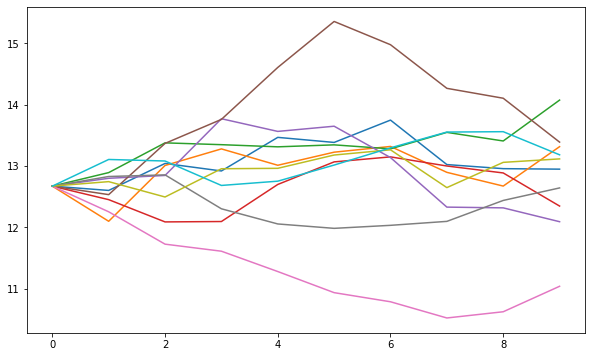

In [74]:
fig = plt.figure(figsize=(10,6))
plt.plot(price_list[:10,:])
data_array = data[-100:90].values
plt.plot(data_array,fmt='o',label='O')
plt.legend()
#data_array
#data[-100:-90].plot()
plt.show()

## TA-Lib

Techincal Analysis Library

install:  https://mrjbq7.github.io/ta-lib/install.html
1.先装依赖再pip3 
Download ta-lib-0.4.0-src.tar.gz and:
$ tar -xvf ta-lib-0.4.0-src.tar.gz  
$ ./configure --prefix=/usr
$ make
$ sudo make install

pip3 install LA-Lib

In [5]:
import numpy
import talib
from talib import MA_Type

close = numpy.random.random(100)
output = talib.SMA(close)
#output


upper, middle, lower = talib.BBANDS(close, matype=MA_Type.T3)
upper

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 1.10464042,
       1.18024474, 1.10002888, 1.01505652, 0.93959925, 0.99244195,
       0.97638168, 1.11732442, 1.21920999, 1.25116254, 1.24647614,
       1.2764529 , 1.0694531 , 0.9877409 , 0.97979135, 1.01371651,
       1.1242386 , 1.17390221, 1.0219957 , 0.83118944, 0.23520512,
       0.51398777, 0.4881524 , 0.49110022, 0.64299471, 0.97405475,
       1.22803453, 1.24729508, 1.05905541, 1.18495031, 1.19722747,
       1.19408755, 1.11670004, 1.14473768, 0.9766286 , 0.92725036,
       1.07993165, 1.20835319, 1.3139438 , 1.22636459, 1.19637722,
       1.14008957, 1.15941991, 1.0600064 , 1.03223553, 1.04794464,
       0.95906814, 1.05057087, 1.00239819, 1.07793305, 0.98742